In [ ]:
# Task1_0531. auto_mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.
import pandas as pd

file1 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/auto-mpg.csv'
df = pd.read_csv(file1,index_col=0)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# 결측값 처리
import numpy as np
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()
# df = df.astype({'horsepower': 'float64'})

df1 = df.reset_index()
df1


# 숫자형 데이터를 가진 열들만 선택
# (include=[np.number])
numeric_columns = df1.select_dtypes(include=[np.number])

# 상관관계 행렬을 계산
correlation_matrix = numeric_columns.corr()

# 상관관계 행렬 출력
correlation_matrix

In [ ]:
import matplotlib.pyplot as plt
numeric_columns.plot.box()
plt.title('Box Plot')
plt.show()

In [ ]:
num_columns = len(numeric_columns.columns)

plt.figure(figsize=(10,10))

for i, column in enumerate(numeric_columns.columns):
    plt.subplot(4,3,i+1)
    numeric_columns.boxplot(column=column)
    plt.title(column)


plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 상관계수 행렬 계산
correlation_matrix = numeric_columns.corr()
target_variable = 'mpg'
correlation_threshold = 0.5


correlated_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > correlation_threshold ].index.tolist()
print(correlated_features)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']


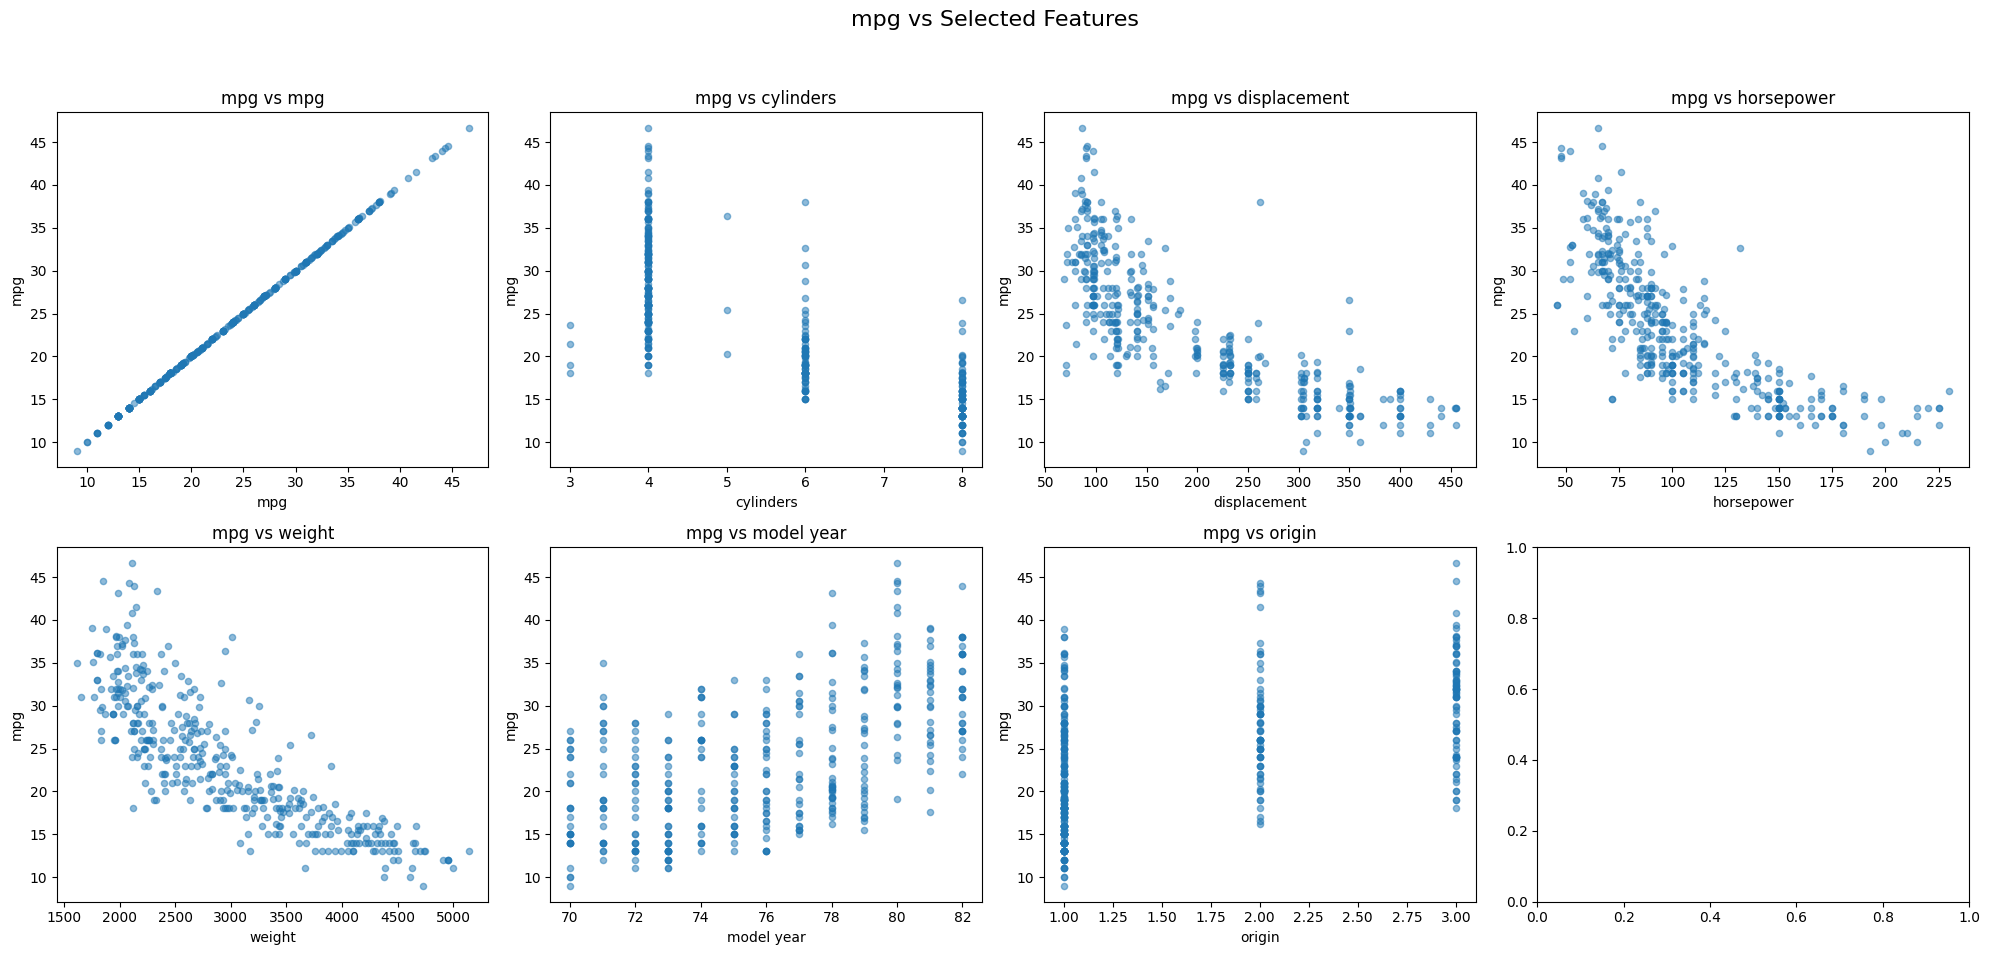

In [ ]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']
target = 'mpg'

fig, axes = plt.subplots(nrows=2, ncols =4, figsize=(20,10))

for i, col in enumerate(columns):
    row,col_idx = divmod(i,4)
    numeric_columns.plot(kind='scatter', x=col, y=target, ax=axes[row,col_idx], alpha = 0.5)
    axes[row, col_idx].set_title(f'{target} vs {col}')

# 전체 제목 설정
fig.suptitle(f'{target} vs Selected Features', fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

correlated_features =  ['mpg','displacement', 'horsepower', 'weight', 'model year']

analysis_df = numeric_columns[correlated_features]
target_variable = 'mpg'
print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

    mpg  displacement  horsepower  weight  model year
0  18.0         307.0       130.0    3504          70
1  15.0         350.0       165.0    3693          70
2  18.0         318.0       150.0    3436          70
3  16.0         304.0       150.0    3433          70
4  17.0         302.0       140.0    3449          70


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 10.64
Root Mean Squared Error: 3.26
R-squared: 0.79


- 일반적인 방법

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Google Colab에서 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

Saving auto-mpg.csv to auto-mpg.csv


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
# 중복제외 고유한 값 출력
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [4]:
# 결측값 처리
import numpy as np
df = df.replace('?', np.nan)
# 변환이 바로 되지 않아서 타입 변환 실행
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

# 'car name' 열 제거
df = df.drop(columns=['car name'])


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB
None


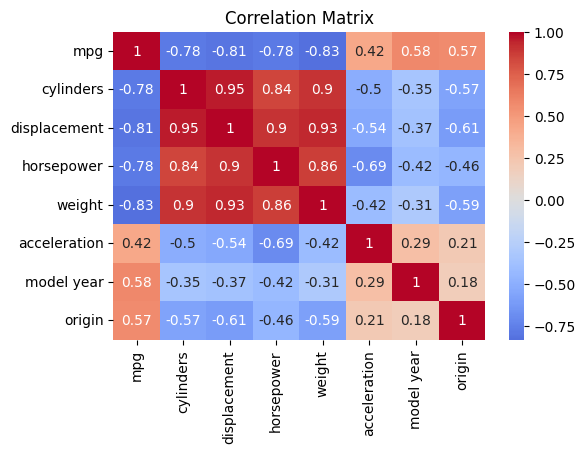

In [5]:
# 탐색적 데이터 분석
plt.figure(figsize = (6,4))
# center = 0 => 색상 맵의 중앙값이 0, 0을 기준으로 cool/warm으로 나누겠다
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',center = 0)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# 변수 선정(상관계수 기반)
target_variable = 'mpg'
correlation_threshold = 0.5
correlated_features = df.corr()[target_variable][abs(df.corr()[target_variable]) > correlation_threshold ].index.tolist()

# 파생 변수 생성 : 예를 들어, 중량 대비 마력비(horsepower-to-weight ratio)
df['hp_to_weight'] = df['horsepower'] / df['weight']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_to_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591


In [9]:
# 분석용 데이터셋 구축
selected_features = correlated_features + ['hp_to_weight']
analysis_df = df[selected_features]

In [15]:
# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프페임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns = analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터 셋 확인
print(scaled_df.head())

   cylinders  displacement  horsepower    weight  model year    origin  \
0   1.483947      1.077290    0.664133  0.620540   -1.625315 -0.716641   
1   1.483947      1.488732    1.574594  0.843334   -1.625315 -0.716641   
2   1.483947      1.182542    1.184397  0.540382   -1.625315 -0.716641   
3   1.483947      1.048584    1.184397  0.536845   -1.625315 -0.716641   
4   1.483947      1.029447    0.924265  0.555706   -1.625315 -0.716641   

   hp_to_weight   mpg  
0      0.382496  18.0  
1      1.661177  15.0  
2      1.488456  18.0  
3      1.494892  16.0  
4      0.971505  17.0  


In [17]:
# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 실제 값과 모델이 예측한 값 간의 평균 제곱 차이를 측정
print(f"Mean Squared Error: {round(mse,2)}")
# 평균 제곱 오차(MSE)의 제곱근으로, 예측 값과 실제 값 사이의 평균 제곱 차이
print(f"Root Mean Squared Error: {round(rmse,2)}")
# 모델이 설명하는 종속 변수의 총 변동 중에서 설명되는 부분의 비율을 의미
# 적합성을 평가하는 데 유용
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 10.139094603469605
Root Mean Squared Error: 3.1841944983731136
R-squared: 0.8013522973313041
